In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all/Income_training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   compositeHourlyWages  3197 non-null   float64
 1   age                   3197 non-null   int64  
 2   yearsEducation        3197 non-null   int64  
 3   sex1M0F               3197 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 100.0 KB


In [3]:
df.head()

,compositeHourlyWages,age,yearsEducation,sex1M0F
0,21.38,58,10,1
1,25.15,42,16,1
2,8.57,31,12,0
3,12.07,43,13,0
4,10.97,46,12,0


In [4]:
#create a dataframe with all training data except the target column
train_X = df.drop(columns=['compositeHourlyWages'])
#check that the target variable has been removed
train_X.head()


,age,yearsEducation,sex1M0F
0,58,10,1
1,42,16,1
2,31,12,0
3,43,13,0
4,46,12,0


In [5]:
#create a dataframe with only the target column
train_y = df[['compositeHourlyWages']]
#view dataframe
train_y.head()


,compositeHourlyWages
0,21.38
1,25.15
2,8.57
3,12.07
4,10.97


In [6]:
#get number of columns in training data
n_cols = train_X.shape[1]
print(n_cols)


3


In [7]:
#create model
model = Sequential()
#add model layers
model.add(Dense(16, activation='relu', input_shape=(n_cols,))) # (3+1)^2
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu')) # cải tiến bằng cách thử cho học sâu hơn, 
model.add(Dense(1))


In [8]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve any
early_stopping_monitor = EarlyStopping(patience=10)
#train model
history = model.fit(train_X, train_y, epochs=300, 
                    batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping_monitor])


Epoch 1/300
80/80 [==============================] - 1s 4ms/step - loss: 276.4043 - val_loss: 209.9545
Epoch 2/300
80/80 [==============================] - 0s 3ms/step - loss: 125.5437 - val_loss: 49.1092
Epoch 3/300
80/80 [==============================] - 0s 3ms/step - loss: 47.8065 - val_loss: 42.3751
Epoch 4/300
80/80 [==============================] - 0s 3ms/step - loss: 46.4846 - val_loss: 41.8133
Epoch 5/300
80/80 [==============================] - 0s 3ms/step - loss: 45.6811 - val_loss: 41.5530
Epoch 6/300
80/80 [==============================] - 0s 3ms/step - loss: 45.4019 - val_loss: 41.0349
Epoch 7/300
80/80 [==============================] - 0s 3ms/step - loss: 45.0117 - val_loss: 40.6444
Epoch 8/300
80/80 [==============================] - 0s 3ms/step - loss: 44.4927 - val_loss: 40.4724
Epoch 9/300
80/80 [==============================] - 0s 3ms/step - loss: 44.2562 - val_loss: 40.1562
Epoch 10/300
80/80 [==============================] - 0s 3ms/step - loss: 43.8708 - val_

80/80 [==============================] - 0s 3ms/step - loss: 39.6950 - val_loss: 35.7802
Epoch 82/300
80/80 [==============================] - 0s 3ms/step - loss: 39.6548 - val_loss: 35.7790
Epoch 83/300
80/80 [==============================] - 0s 3ms/step - loss: 39.7475 - val_loss: 35.6570
Epoch 84/300
80/80 [==============================] - 0s 3ms/step - loss: 39.5889 - val_loss: 36.1409
Epoch 85/300
80/80 [==============================] - 0s 3ms/step - loss: 39.9999 - val_loss: 35.9251
Epoch 86/300
80/80 [==============================] - 0s 3ms/step - loss: 39.8180 - val_loss: 35.5869
Epoch 87/300
80/80 [==============================] - 0s 3ms/step - loss: 39.7816 - val_loss: 35.5522
Epoch 88/300
80/80 [==============================] - 0s 3ms/step - loss: 39.8483 - val_loss: 35.9493
Epoch 89/300
80/80 [==============================] - 0s 3ms/step - loss: 39.6107 - val_loss: 35.7183
Epoch 90/300
80/80 [==============================] - 0s 3ms/step - loss: 39.5835 - val_loss: 3

dict_keys(['loss', 'val_loss'])


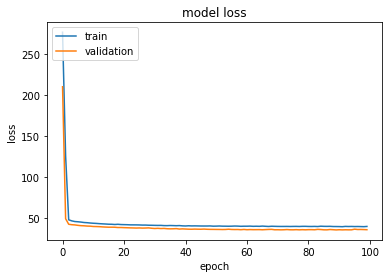

In [12]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# evaluate the model
scores = model.evaluate(train_X, train_y)
print(scores)

100/100 [==============================] - 0s 1ms/step - loss: 38.6354
38.63536071777344


In [14]:
# Making predict on new data
df_test = pd.read_csv("all/Income_testing.csv")
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              800 non-null    int64
 1   age             800 non-null    int64
 2   yearsEducation  800 non-null    int64
 3   sex1M0F         800 non-null    int64
dtypes: int64(4)
memory usage: 25.1 KB


In [15]:
df_test.head()

,ID,age,yearsEducation,sex1M0F
0,1,36,20,0
1,2,38,17,0
2,3,24,10,0
3,4,39,12,1
4,5,50,12,0


In [16]:
test_X = df_test.drop(columns=["ID"])


In [17]:
test_y_predictions = model.predict(test_X)

In [18]:
test_y_predictions[:10]

array([[20.745283 ],
       [19.198248 ],
       [10.535824 ],
       [18.107248 ],
       [13.5775795],
       [18.604898 ],
       [18.202951 ],
       [19.402927 ],
       [13.18818  ],
       [13.684984 ]], dtype=float32)